# Group 1: Final Project: **Predicting Diabetes**

# Importing the Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import time
import itertools
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn-white')

## Data Cleaning & Exploratory Data Analysis

In [2]:
diabetes_data = pd.read_csv('diabetes_data.csv')

In [3]:
diabetes_data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
diabetes_data.head(10)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


**Diabetes Dataset**

***Variables***:

1) Age: 1 = 18-24 / 2 = 25-29 / 3 = 30-34 / 4 = 35-39 / 5 = 40-44 /6 = 45-49 / 7 = 50-54 / 8 = 55-59 / 9 = 60-64 / 10 = 65-69 /11 = 70-74 / 12 = 75-79 / 13 = 80 or older

2) Sex: 1 male, 0 female.

3) HighChol: 0 for no high cholesterol, 1 for high cholesterol.

4) CholCheck: 0 for no cholesterol check in 5 yrs, 1 for yes.

5) BMI

6) Smoker: 0 for not smoked 5 packs of cigarettes in lifetime, 1 for yes.

7) HeartDiseaseorAttack: 0 for no, 1 for yes.

8) PhysActivity: in the past 30 days, 0 for no and 1 for yes.

9) Fruits: 1 for fruit consumed 1 or more times a day, 0 for no.

10) Veggies: 1 for vegetables consumed 1 or more times a day, 0 for no.

11) HvyAlcoholConsump: 0 for no, 1 for yes.

12) GenHlth: 1 =excellent, 2=very good, 3=good, 4=fair, 5=poor.

13) MentHlth:1-30 (days of poor mental health in a month).

14) PhysHlth: 1-30

15) DiffWalk: serious difficulty while walking or climbing stairs (0 for no, 1 for yes).

16) Stroke: 0 for no, 1 for yes.

17) HighBP: 0 for no, 1 for yes.


****Target Variable:****

18) Diabetes: 0 for no, 1 for yes.




***Sample Data:***

1.Age ranges from 4 to 13 in the first few rows.

2.Includes binary variables (0 or 1) for factors like Sex, High Cholesterol, Smoker, etc.

3.Health-related variables like BMI, General Health, Mental Health, and Physical Health are numerically represented.

In [5]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


In [6]:
diabetes_data.shape

(70692, 18)

In [7]:
diabetes_data.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

In [8]:
diabetes_missing_values = diabetes_data.isnull().sum()
diabetes_missing_values

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

**Diabetes Dataset Analysis**

***Basic Statistics***

**Count**: Data for 70,692 individuals.

**Age**: Mean age is approximately 8.58 (this is a number representing age category: 1 = 18-24 yrs, 9=60-64, 13 = 80 or older.).

**BMI**: Mean BMI is 29.85, with a range from 12 to 98.

**General Health**: Average rating is around 2.83, on a scale where lower numbers indicate better health.



***Data Quality***

**Missing Values**: There are no missing values in the dataset.

**Data Types**: Most variables are either float or binary (0/1), indicating a lot of categorical data.

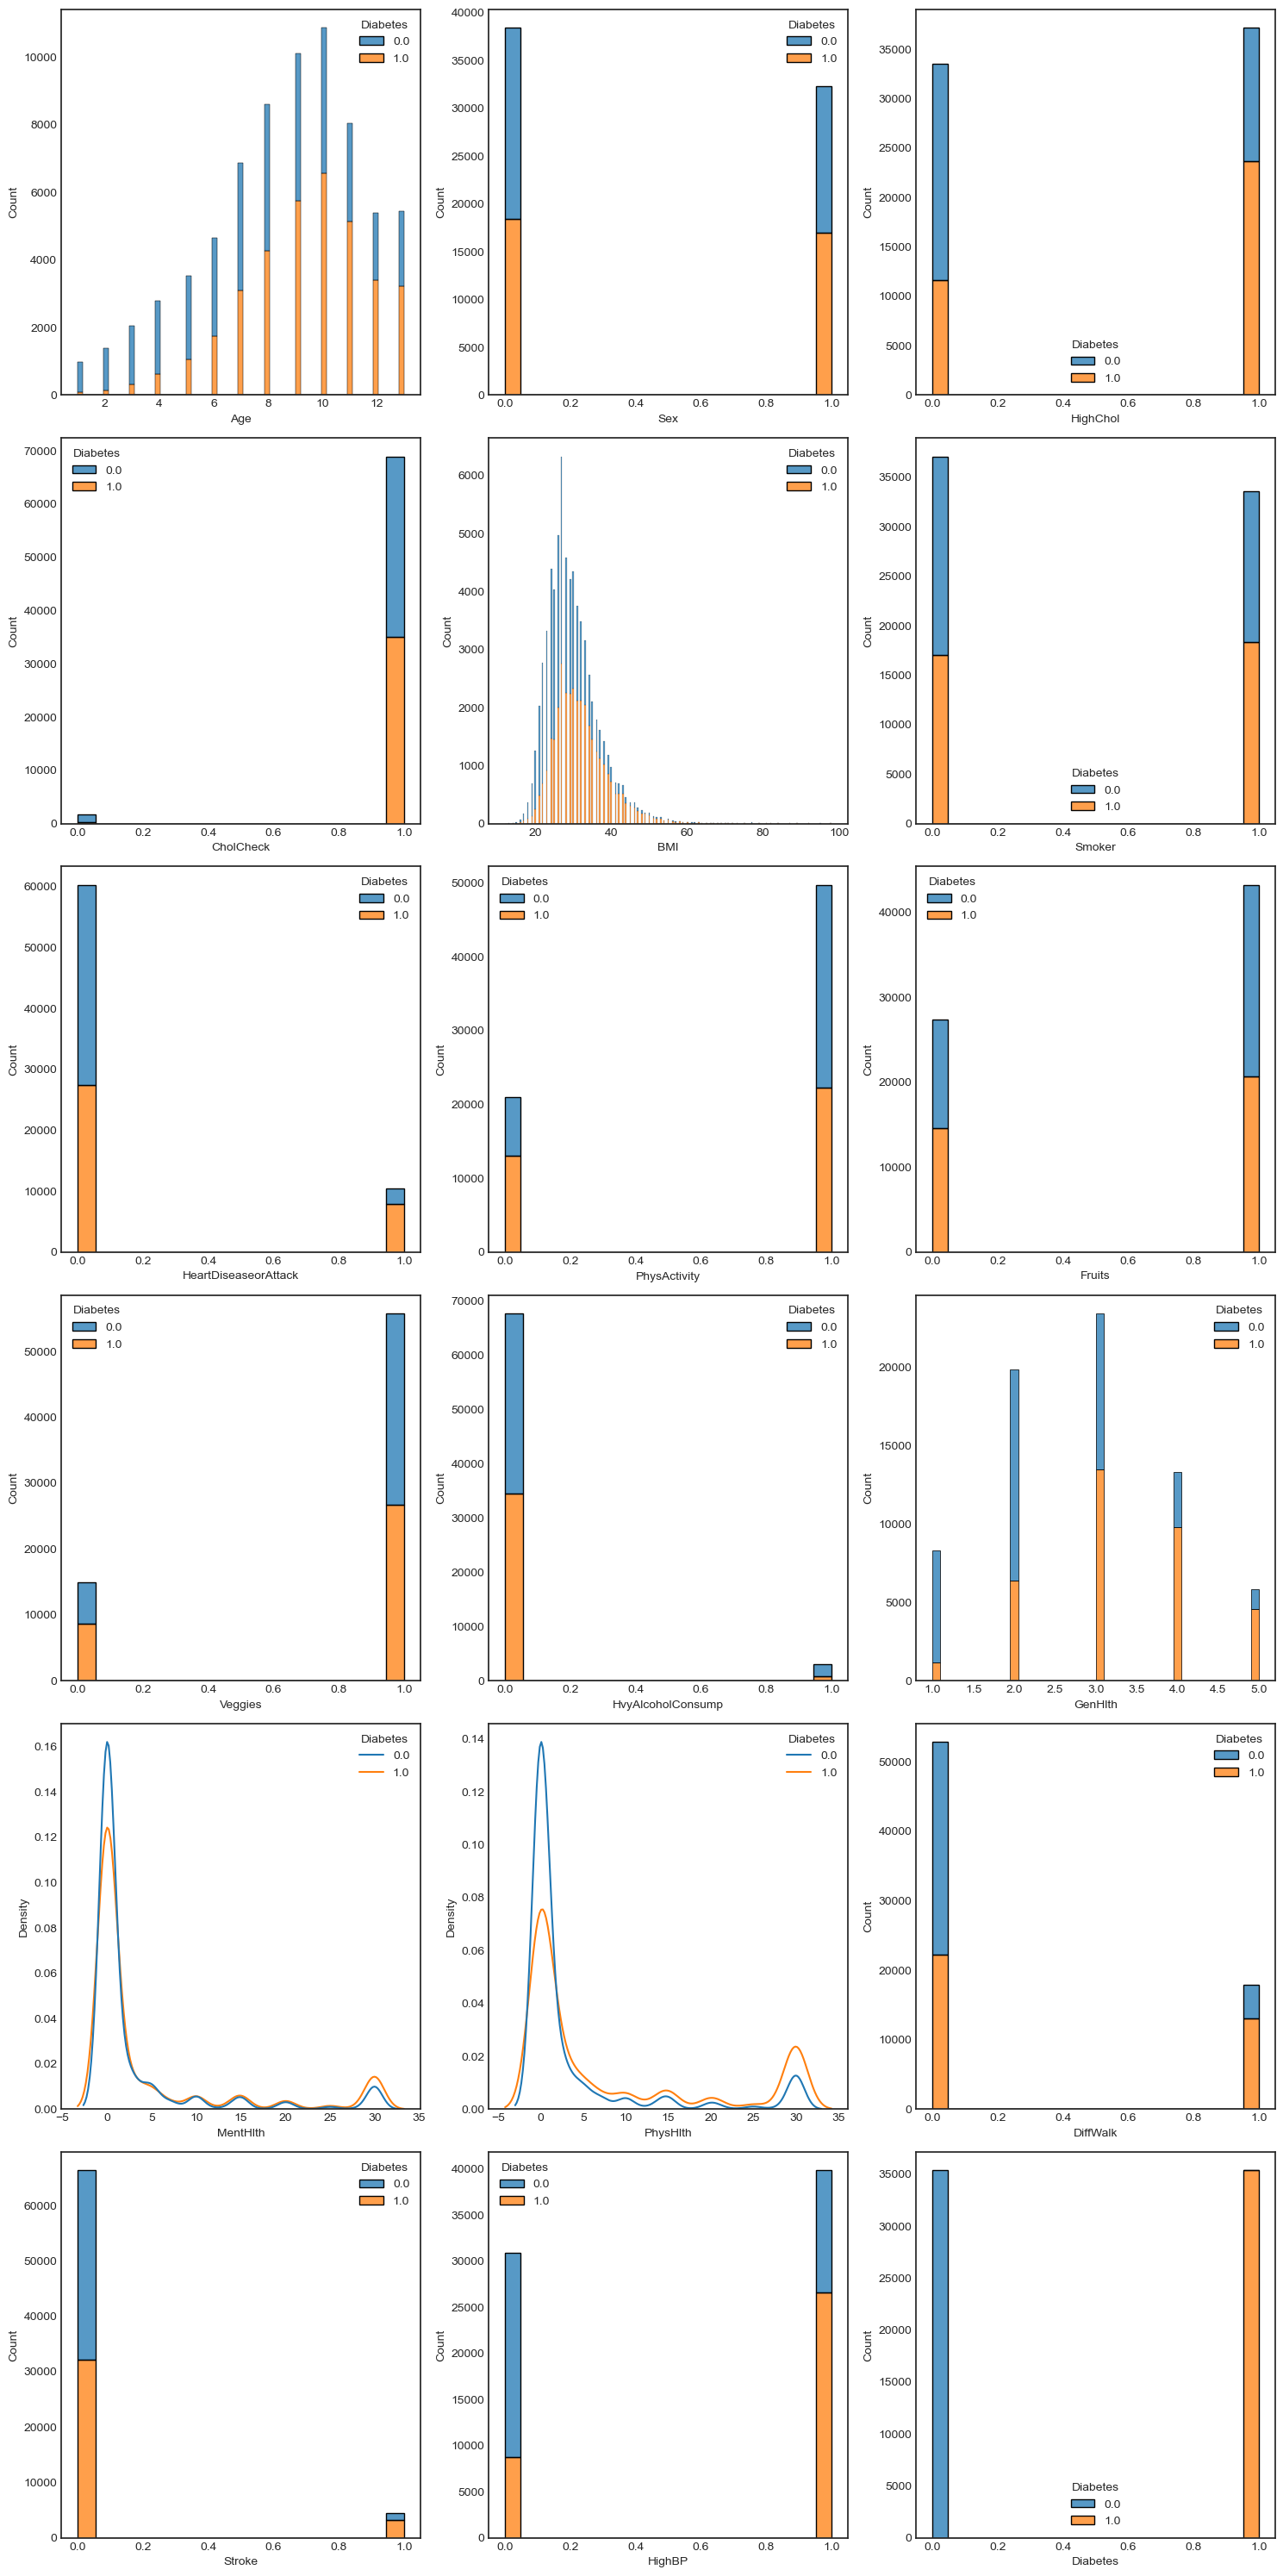

In [9]:
fig, ax = plt.subplots(6, 3, figsize=(15, 30))
i = 0
for col in diabetes_data.columns:
    if col == 'MentHlth' or col == 'PhysHlth':
        sns.kdeplot(data=diabetes_data, x=col, hue='Diabetes', ax=ax[i//3, i%3])
    else:
        sns.histplot(data=diabetes_data, x=col, hue='Diabetes', multiple="stack", ax=ax[i//3, i%3])
    i += 1

for j in range(i, 6*3):
    ax.flatten()[j].set_visible(False)

plt.tight_layout()
plt.show()

# <u> Research Question 1: Exploring the correlation of feature variables with response variable. </u>

**Distribution Analysis**

***Diabetes Dataset***

Age: The distribution appears to be fairly uniform, suggesting the age variable is encoded or categorized.

BMI: Most values are clustered around 25-35, with a right-skewed distribution indicating a few extremely high BMI values.

General Health (GenHlth): A large number of individuals rated their general health in the middle range, with fewer at the extremes.

Mental Health (MentHlth): A large peak at the lower end suggests many individuals report no or few mental health issues.

Physical Health (PhysHlth): Similar to mental health, most individuals report low physical health issues, with a long tail indicating some with more severe problems.


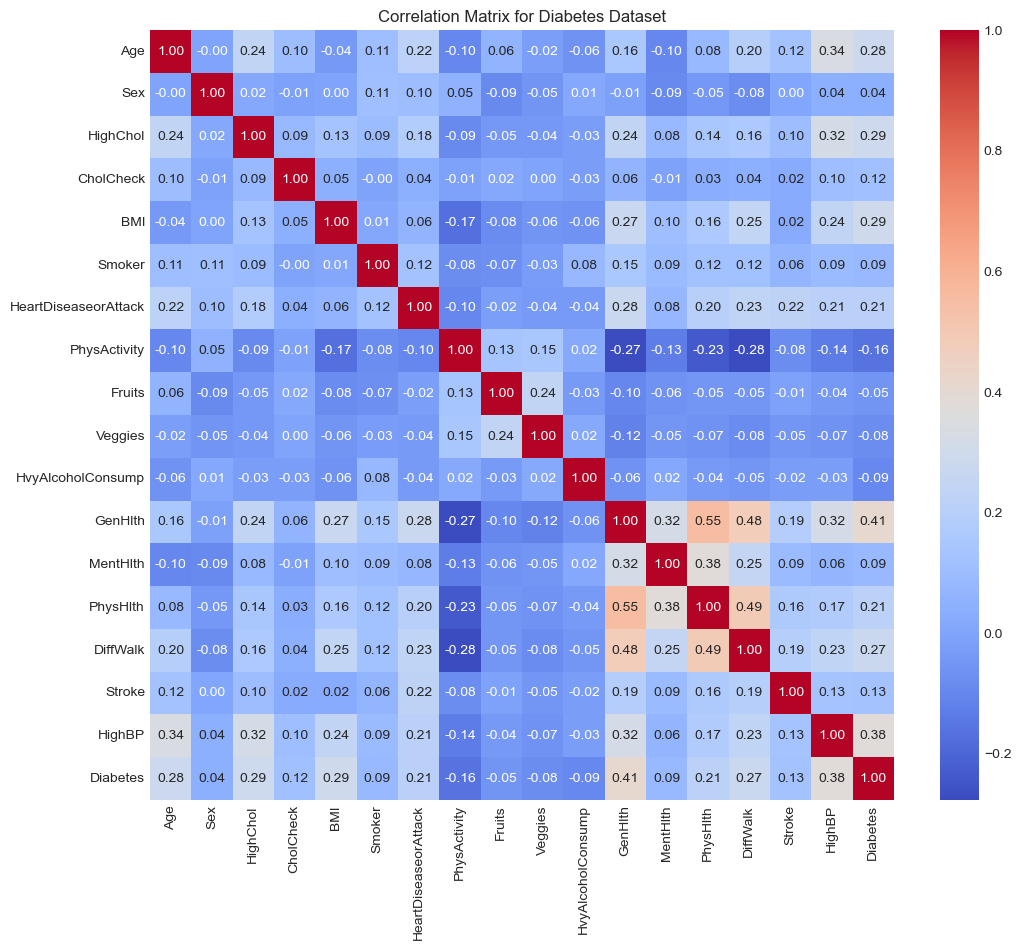

In [10]:
diabetes_corr = diabetes_data.corr()

plt.figure(figsize=(12, 10))
plt.title('Correlation Matrix for Diabetes Dataset')
sns.heatmap(diabetes_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [11]:
diabetes_corr['Diabetes'].sort_values(ascending=False)

Diabetes                1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
Name: Diabetes, dtype: float64

**Correlation Analysis**

***Diabetes Dataset***

Strong Correlations: The most notable correlations are between variables that are intuitively related, such as 'HighChol' (High Cholesterol) and 'HighBP' (High Blood Pressure), indicating a link between cholesterol levels and blood pressure.

Diabetes: Correlation with 'Age', 'HighChol', 'HighBP', and 'BMI' suggests these factors are significant in the context of diabetes. Notably, 'Diabetes' has a moderate positive correlation with 'BMI' and 'HighBP'.

General Health: 'GenHlth' shows moderate positive correlations with 'MentHlth' and 'PhysHlth', indicating that general health perception aligns with mental and physical health conditions.

**Summary**

***Diabetes Dataset***: Factors like age, high cholesterol, high blood pressure, and BMI are important considerations for diabetes. It's essential to focus on these variables for deeper analysis and modeling.

# Data Processing: Z-score standardization

In [12]:
columns_to_standardize = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

scaler = StandardScaler()

standard_diabetes = diabetes_data.drop(columns=["Diabetes"])

standard_diabetes[columns_to_standardize] = scaler.fit_transform(standard_diabetes[columns_to_standardize])

standard_diabetes.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,70692.0,-1.376393e-14,1.000007,-2.659082,-0.555393,0.145837,0.847066,1.548296
Sex,70692.0,4.569965e-01,0.498151,0.000000,0.000000,0.000000,1.000000,1.000000
HighChol,70692.0,5.257030e-01,0.499342,0.000000,0.000000,1.000000,1.000000,1.000000
CholCheck,70692.0,9.752589e-01,0.155336,0.000000,1.000000,1.000000,1.000000,1.000000
BMI,70692.0,1.019515e-15,1.000007,-2.510153,-0.682745,-0.120466,0.441813,9.578850
Smoker,70692.0,4.752730e-01,0.499392,0.000000,0.000000,0.000000,1.000000,1.000000
HeartDiseaseorAttack,70692.0,1.478102e-01,0.354914,0.000000,0.000000,0.000000,0.000000,1.000000
PhysActivity,70692.0,7.030357e-01,0.456924,0.000000,0.000000,1.000000,1.000000,1.000000
Fruits,70692.0,6.117948e-01,0.487345,0.000000,0.000000,1.000000,1.000000,1.000000
Veggies,70692.0,7.887738e-01,0.408181,0.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
X = standard_diabetes
y = diabetes_data.Diabetes

# Data Splitting

In [14]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <u> Research Question 2: Developing a predictive model that accurately identifies individuals at risks of these conditions. </u>


# Classifier 1: Logistic regression
```
```



In [15]:
Model_Accuracies = {
    "Accuracy Score": [],
    "Precision Score": [],
    "Recall Score": [],
    "F1 Score": []
}

In [16]:
LG = LogisticRegression().fit(X_train, y_train)

Accuracy Score = 0.7464460004243582
Precision Score = 0.73475196530225
Recall Score = 0.7690452546460491
F1 Score = 0.7515075899355375


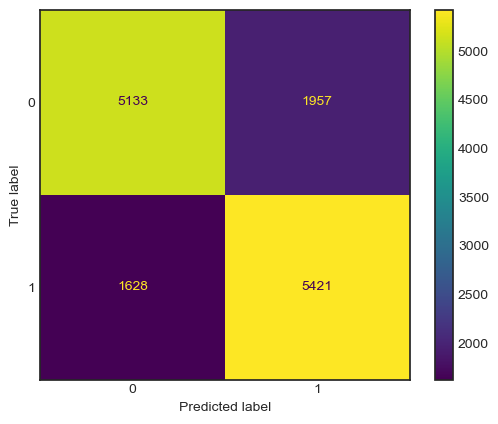

In [17]:
# Prediction.
y_pred_test = LG.predict(X_test)

logistic_regression_scores = {
    'Accuracy Score': accuracy_score(y_test, y_pred_test),
    'Precision Score': precision_score(y_test, y_pred_test, pos_label=1),
    'Recall Score': recall_score(y_test, y_pred_test, pos_label=1),
    'F1 Score': f1_score(y_test, y_pred_test, pos_label=1)
}

for metric, value in logistic_regression_scores.items():
    print(f'{metric} = {value}')
    Model_Accuracies[metric].append(value)


ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test)).plot()

# Classifier 2: K-Nearest Neighbor (KNN)

In [18]:
#knn: K-value: 1
neighbor1 = KNeighborsClassifier(n_neighbors=1)
neighbor1.fit(X_train, y_train)
yPred_1 = neighbor1.predict(X_test)

In [19]:
knn1_scores = {
    'Accuracy Score': accuracy_score(y_test, yPred_1),
    'Precision Score': precision_score(y_test, yPred_1, pos_label=1),
    'Recall Score': recall_score(y_test, yPred_1, pos_label=1),
    'F1 Score': f1_score(y_test, yPred_1, pos_label=1)
}

print('When k = 1, ')
for metric, value in knn1_scores.items():
    print(f'{metric} = {value}')
    Model_Accuracies[metric].append(value)

When k = 1, 
Accuracy Score = 0.6685055520192376
Precision Score = 0.6648980731639207
Recall Score = 0.6755568165697262
F1 Score = 0.6701850679051439


In [20]:
#knn: K-value: 3
neighbor3 = KNeighborsClassifier(n_neighbors=3)
neighbor3.fit(X_train, y_train)
yPred_3 = neighbor3.predict(X_test)

In [21]:
knn3_scores = {
    'Accuracy Score': accuracy_score(y_test, yPred_3),
    'Precision Score': precision_score(y_test, yPred_3, pos_label=1),
    'Recall Score': recall_score(y_test, yPred_3, pos_label=1),
    'F1 Score': f1_score(y_test, yPred_3, pos_label=1)
}

print('When k = 3, ')
for metric, value in knn3_scores.items():
    print(f'{metric} = {value}')
    Model_Accuracies[metric].append(value)

When k = 3, 
Accuracy Score = 0.6998373293726572
Precision Score = 0.6896038934703258
Recall Score = 0.7236487445027664
F1 Score = 0.706216253634224


In [22]:
#knn: K-value: 5
neighbor5 = KNeighborsClassifier(n_neighbors=5)
neighbor5.fit(X_train, y_train)
yPred_5 = neighbor5.predict(X_test)

In [23]:
knn5_scores = {
    'Accuracy Score': accuracy_score(y_test, yPred_5),
    'Precision Score': precision_score(y_test, yPred_5, pos_label=1),
    'Recall Score': recall_score(y_test, yPred_5, pos_label=1),
    'F1 Score': f1_score(y_test, yPred_5, pos_label=1)
}

print('When k = 5, ')
for metric, value in knn5_scores.items():
    print(f'{metric} = {value}')
    Model_Accuracies[metric].append(value)

When k = 5, 
Accuracy Score = 0.7150434967112242
Precision Score = 0.7005844845908608
Recall Score = 0.7481912327989786
F1 Score = 0.7236056801811072


KNN produced the highest accuracy, precision, recall and F1 score when K = 5. We will be using the (K = 5) model for the ensemble.

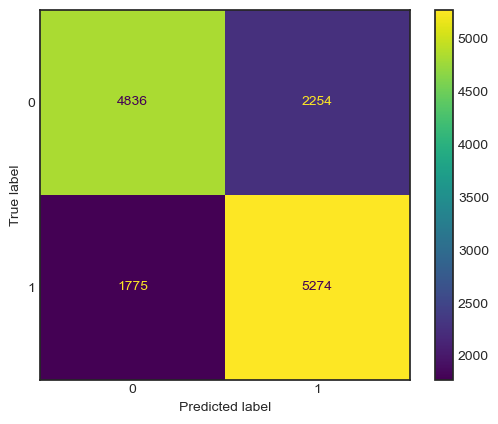

In [24]:
# Confusion matrix for K=5.
ConfusionMatrixDisplay(confusion_matrix(y_test, yPred_5)).plot()

# Classifier 3: Stochastic Gradient Descent (SGD)

In [25]:
 # create an SGDClassifier and train it on the whole training set:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [26]:
sgd_pred = sgd_clf.predict(X_test)

In [27]:
sgd_scores = {
    'Accuracy Score': accuracy_score(y_test, sgd_pred),
    'Precision Score': precision_score(y_test, sgd_pred, pos_label=1),
    'Recall Score': recall_score(y_test, sgd_pred, pos_label=1),
    'F1 Score': f1_score(y_test, sgd_pred, pos_label=1)
}

for metric, value in sgd_scores.items():
    print(f'{metric} = {value}')
    Model_Accuracies[metric].append(value)

Accuracy Score = 0.7456680104675012
Precision Score = 0.7096030108049047
Recall Score = 0.8291956305858987
F1 Score = 0.7647520607091456


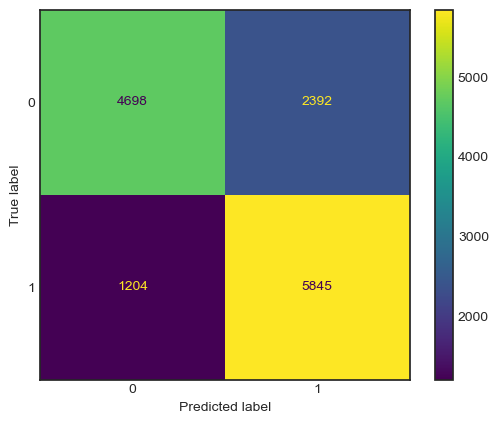

In [28]:
ConfusionMatrixDisplay(confusion_matrix(y_test, sgd_pred)).plot()

# Classifier 4: Random Forest Classifier

In [29]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
 # Predicting the classes for testing set.
rnd_pred = rnd_clf.predict(X_test)

In [31]:
random_forest_scores = {
    'Accuracy Score': accuracy_score(y_test, rnd_pred),
    'Precision Score': precision_score(y_test, rnd_pred, pos_label=1),
    'Recall Score': recall_score(y_test, rnd_pred, pos_label=1),
    'F1 Score': f1_score(y_test, rnd_pred, pos_label=1)
}

for metric, value in random_forest_scores.items():
    print(f'{metric} = {value}')
    Model_Accuracies[metric].append(value)

Accuracy Score = 0.7271377042223637
Precision Score = 0.7104048529605697
Recall Score = 0.7642218754433253
F1 Score = 0.7363313285948606


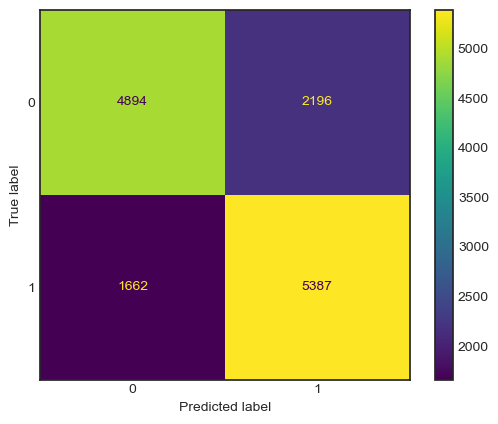

In [32]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rnd_pred)).plot()

# Classifier 5: Bagging

In [33]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500,
                            max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, random_state=42)

In [34]:
bag_pred = bag_clf.predict(X_test)

In [35]:
bagging_scores = {
    'Accuracy Score': accuracy_score(y_test, bag_pred),
    'Precision Score': precision_score(y_test, bag_pred, pos_label=1),
    'Recall Score': recall_score(y_test, bag_pred, pos_label=1),
    'F1 Score': f1_score(y_test, bag_pred, pos_label=1)
}

for metric, value in bagging_scores.items():
    print(f'{metric} = {value}')
    Model_Accuracies[metric].append(value)

Accuracy Score = 0.7465874531437867
Precision Score = 0.7299628450106157
Recall Score = 0.7803943821818697
F1 Score = 0.7543366472403153


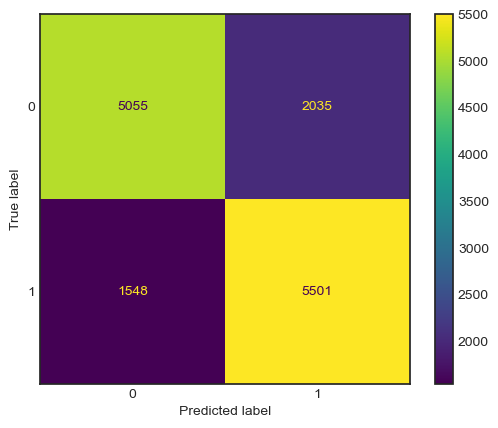

In [36]:
ConfusionMatrixDisplay(confusion_matrix(y_test, bag_pred)).plot()

# Classifier 6: Decision Tree Classifier

In [37]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
tree_pred = tree_clf.predict(X_test)

In [39]:
decision_tree_scores = {
    'Accuracy Score': accuracy_score(y_test, tree_pred),
    'Precision Score': precision_score(y_test, tree_pred, pos_label=1),
    'Recall Score': recall_score(y_test, tree_pred, pos_label=1),
    'F1 Score': f1_score(y_test, tree_pred, pos_label=1)
}

for metric, value in decision_tree_scores.items():
    print(f'{metric} = {value}')
    Model_Accuracies[metric].append(value)

Accuracy Score = 0.6586038616592405
Precision Score = 0.663286302175191
Recall Score = 0.6402326571144843
F1 Score = 0.65155561972136


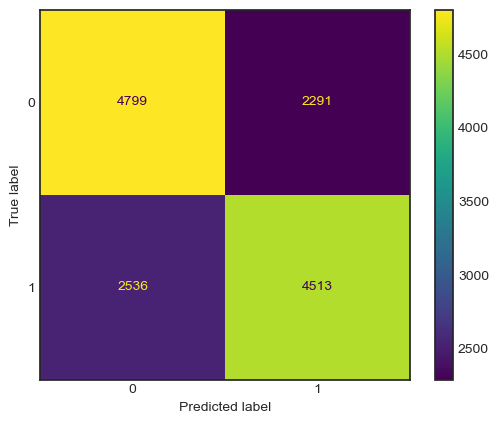

In [40]:
ConfusionMatrixDisplay(confusion_matrix(y_test, tree_pred)).plot()

Decision tree gave the lowest accuracy, precision, recall and F1 score.

# Classifier 7: Linear Support Vector Machine (SVM)

In [41]:
cost = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
accuracy={}
for i in cost:
    svm_clf = Pipeline([('scaler',StandardScaler()),
    ("linear_svc", LinearSVC(C=i, loss="hinge",random_state = 42))])
    svm_clf.fit(X_train, y_train)
    svm_pred = svm_clf.predict(X_test)
    accuracy[i] = accuracy_score(y_test, svm_pred)
print("Accuracy for different cost parameter: ")
accuracy

Accuracy for different cost parameter: 


{0.0001: 0.7392319117335031,
 0.001: 0.7437583987552161,
 0.01: 0.7463045477049296,
 0.1: 0.7463045477049296,
 1: 0.746163094985501,
 10: 0.7464460004243582,
 100: 0.6752245561920928,
 1000: 0.6031543956432562,
 10000: 0.6031543956432562}

Cost parameter equal to 10 produced the highest accuracy (accuracy = 0.7464460004243582). We will be using the model with c = 10 for the ensemble model.

In [42]:
best_c = 10

# Create the tuned LinearSVC model
tuned_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=best_c, loss="hinge", random_state=42))
])
tuned_svm_clf.fit(X_train, y_train)
tuned_svm_pred = tuned_svm_clf.predict(X_test)

In [43]:
tuned_svm_scores = {
    'Accuracy Score': accuracy_score(y_test, tuned_svm_pred),
    'Precision Score': precision_score(y_test, tuned_svm_pred, pos_label=1),
    'Recall Score': recall_score(y_test, tuned_svm_pred, pos_label=1),
    'F1 Score': f1_score(y_test, tuned_svm_pred, pos_label=1)
}

for metric, value in tuned_svm_scores.items():
    print(f'{metric} = {value}')
    Model_Accuracies[metric].append(value)

Accuracy Score = 0.7464460004243582
Precision Score = 0.7237726098191214
Recall Score = 0.7947226556958433
F1 Score = 0.7575901007505577


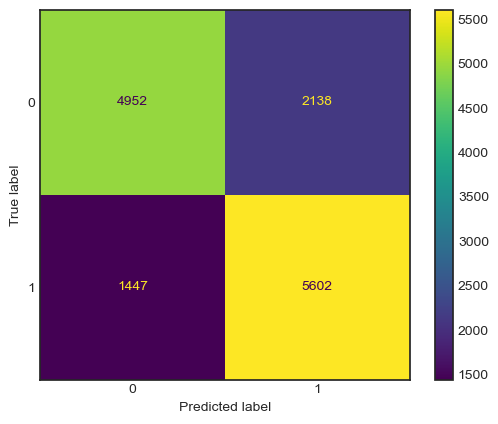

In [44]:
ConfusionMatrixDisplay(confusion_matrix(y_test, tuned_svm_pred)).plot()

# Ensemble of All the Classifiers

Decision trees, when included in the ensemble, decreased the accuracy of the model. So, it was discarded, and the ensemble model has been created in aggregate of only 6 classifiers: Random Forest, Bagging, Logistic Regression, K-Nearest Neighbor, SGD and SVM.

In [45]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rnd_clf),
        ('bg', bag_clf),
        ('lr', LG),
        ('knn', neighbor5),
        ('sgd', sgd_clf),
        ('svm', tuned_svm_clf)
    ],
    voting='hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('bg',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                                max_samples=100,
                                                n_estimators=500,
                                                random_state=42)),
                             ('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('sgd', SGDClassifier(random_state=42)),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('linear_svc',
                                               LinearSVC(C=10, loss='hinge',
                                                         random_state=42))]))])

In [46]:
voting_pred = voting_clf.predict(X_test)

In [47]:
voting_classifier_scores = {
    'Accuracy Score': accuracy_score(y_test, voting_pred),
    'Precision Score': precision_score(y_test, voting_pred, pos_label=1),
    'Recall Score': recall_score(y_test, voting_pred, pos_label=1),
    'F1 Score': f1_score(y_test, voting_pred, pos_label=1)
}

for metric, value in voting_classifier_scores.items():
    print(f'{metric} = {value}')
    Model_Accuracies[metric].append(value)

Accuracy Score = 0.7481434330575005
Precision Score = 0.7323474553690381
Recall Score = 0.7798269258050787
F1 Score = 0.7553418069391962


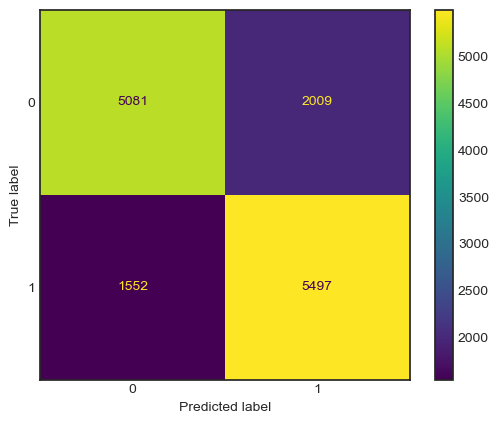

In [48]:
ConfusionMatrixDisplay(confusion_matrix(y_test, voting_pred)).plot()

looks like the false-positive and true-negatives predictions drop in ensemble. we should put them side by side and see how their number changes.

In [49]:
accuracies_df = pd.DataFrame(Model_Accuracies)

model_names = [
    "Logistic Regression",
    "KNN -1",
    "KNN-3",
    "KNN-5",
    "SGD",
    "Random Forest",
    "Bagging",
    "Decision Tree",
    "Tuned SVM",
    "Ensemble"
]


accuracies_df.index = model_names


print(accuracies_df)

                     Accuracy Score  Precision Score  Recall Score  F1 Score
Logistic Regression        0.746446         0.734752      0.769045  0.751508
KNN -1                     0.668506         0.664898      0.675557  0.670185
KNN-3                      0.699837         0.689604      0.723649  0.706216
KNN-5                      0.715043         0.700584      0.748191  0.723606
SGD                        0.745668         0.709603      0.829196  0.764752
Random Forest              0.727138         0.710405      0.764222  0.736331
Bagging                    0.746587         0.729963      0.780394  0.754337
Decision Tree              0.658604         0.663286      0.640233  0.651556
Tuned SVM                  0.746446         0.723773      0.794723  0.757590
Ensemble                   0.748143         0.732347      0.779827  0.755342


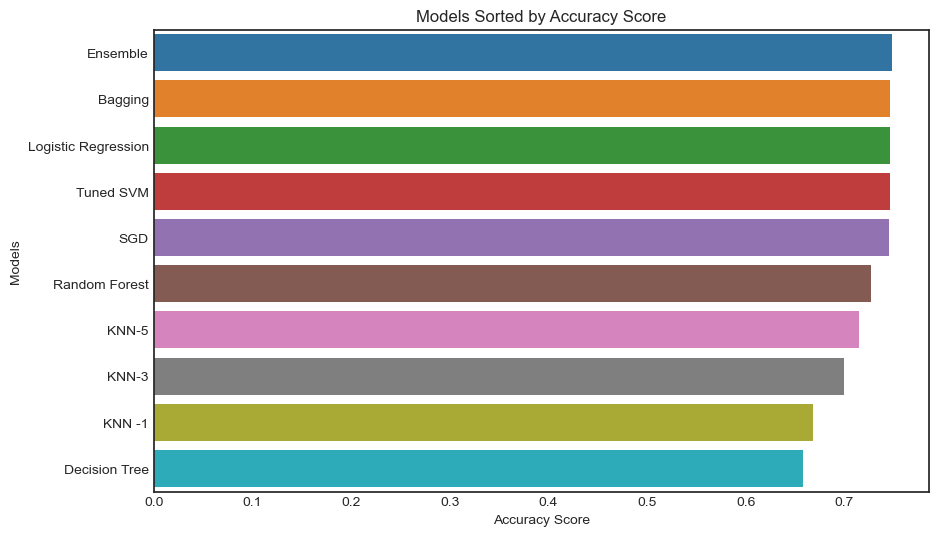

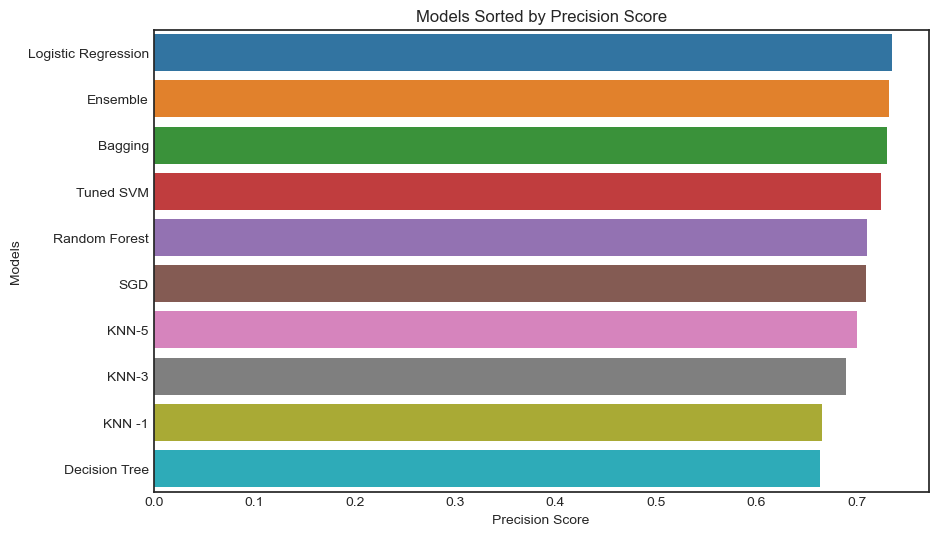

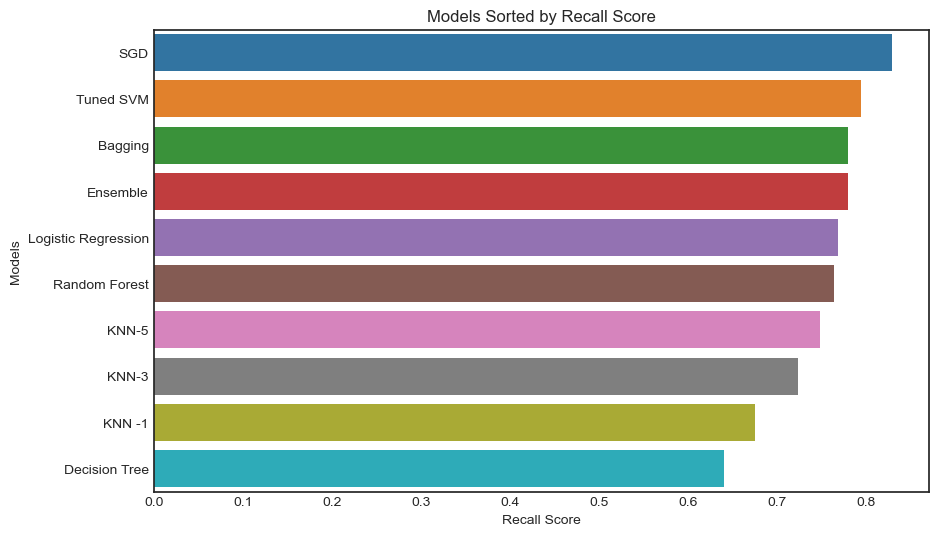

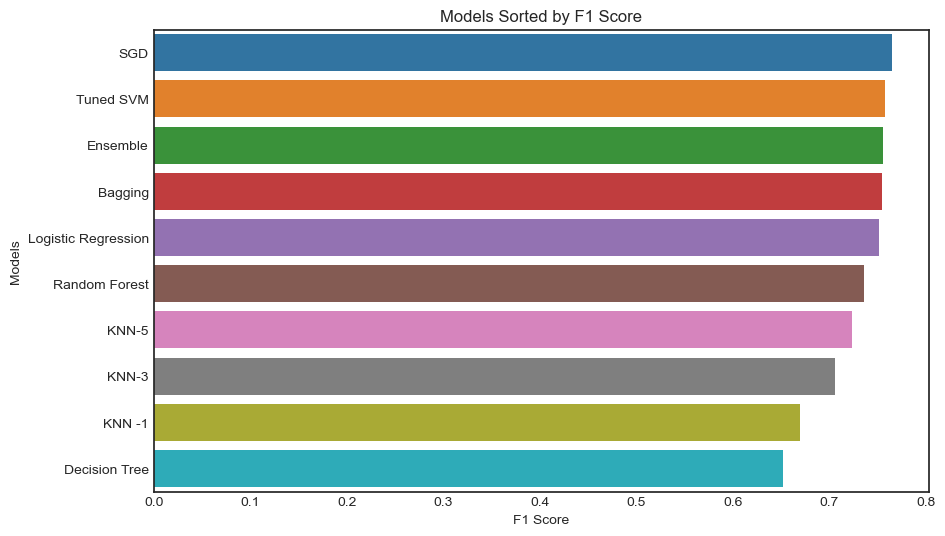

In [50]:
for metric in accuracies_df.columns:
    sorted_df = accuracies_df.sort_values(by=metric, ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_df[metric], y=sorted_df.index)
    plt.title(f"Models Sorted by {metric}")
    plt.xlabel(metric)
    plt.ylabel("Models")
    plt.show()


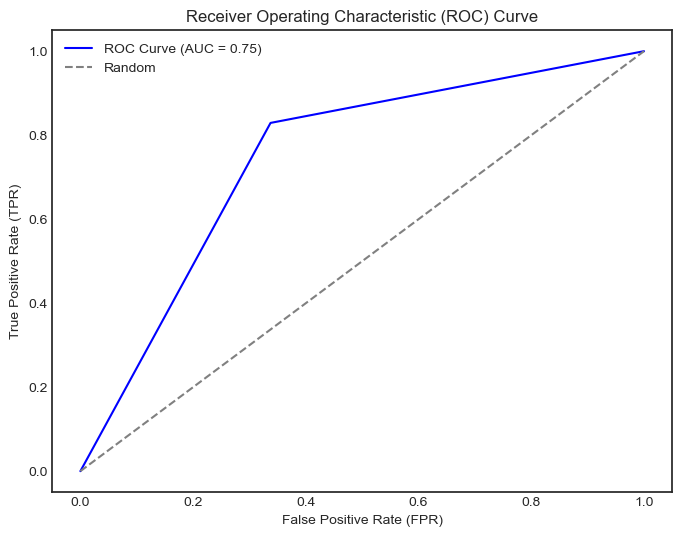

In [51]:
# roc curve for SGD  model (one with highest F1 and recall score.)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, sgd_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='best')
plt.show()

### <u> Research Question 3: What are the key predictors of diabetes in two of the top-performing models? </u>

Logistic Regression and Stochastic Gradient Descent are two of the many ML models we tried that had the highest accuracy and F1 scores. So we will look into top 10 predictors of these models below. Beside, we will also slighlty look into the recursive feature elimination to compare the weight given by these top models and RFE side-by-side.

In [52]:
# LG feature selection

from sklearn.feature_selection import SelectFromModel

features_diabetes = X
target_diabetes = y
diabetes_selector = SelectFromModel(LG)
diabetes_selector.fit(features_diabetes, target_diabetes)
selected_features = features_diabetes.columns[diabetes_selector.get_support()]
print(selected_features)

Index(['Age', 'HighChol', 'CholCheck', 'BMI', 'HvyAlcoholConsump', 'GenHlth',
       'HighBP'],
      dtype='object')


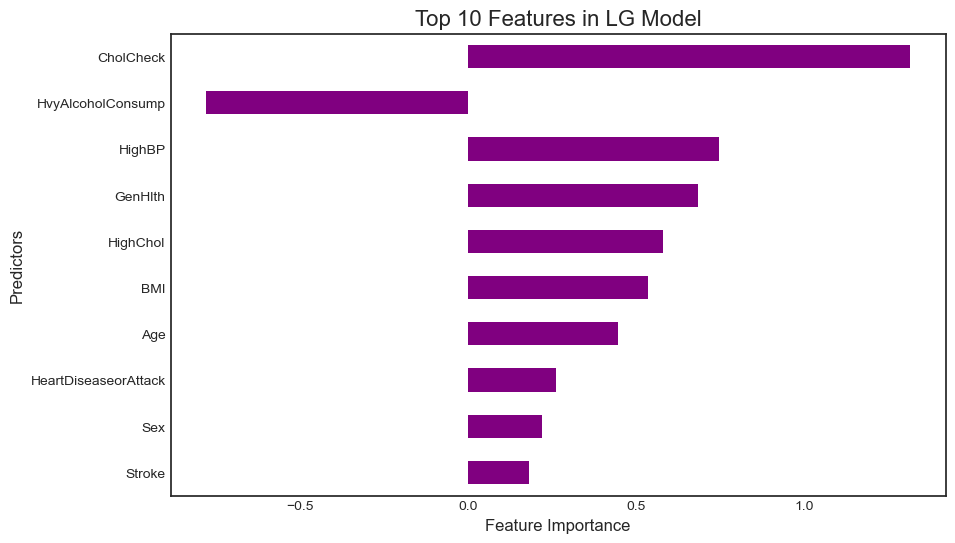

In [53]:
feat_importances_diab = pd.Series(diabetes_selector.estimator_.coef_[0], index=features_diabetes.columns)
top_predictors = np.argsort(np.abs(feat_importances_diab))[-10:]
feat_importances_diab[top_predictors].plot(kind='barh', color='purple', figsize=(10, 6))
plt.title("Top 10 Features in LG Model", fontsize=16)
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Predictors", fontsize=12)
plt.show()


A negative coefficient of feature importance in logistic regression means that as the value of the feature increases, the log-odds of the target variable (likelihood of having diabetes) decreases. In practical terms, this suggests that higher values of the feature (alcohol consumption) are associated with a lower likelihood of the target condition.

In [54]:
best_c = 10

# Create the tuned LinearSVC model
tuned_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=best_c, loss="hinge", random_state=42))
])
tuned_svm_clf = tuned_svm_clf.fit(X_train, y_train)

In [55]:
# Extract the coefficients from the linear_svc model
coefficients = tuned_svm_clf.named_steps['linear_svc'].coef_[0]

# Get the indices of the top 10 features with the highest absolute coefficients
top_10_indices = np.abs(coefficients).argsort()[-10:][::-1]

# Extract the feature names from your dataset (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Get the top 10 feature names
top_10_features = feature_names[top_10_indices]

# Print or use the top 10 features
print("Top 10 Predictors:")
print(top_10_features)


Top 10 Predictors:
Index(['GenHlth', 'BMI', 'HighBP', 'Age', 'HighChol', 'CholCheck',
       'HvyAlcoholConsump', 'HeartDiseaseorAttack', 'Sex', 'PhysHlth'],
      dtype='object')


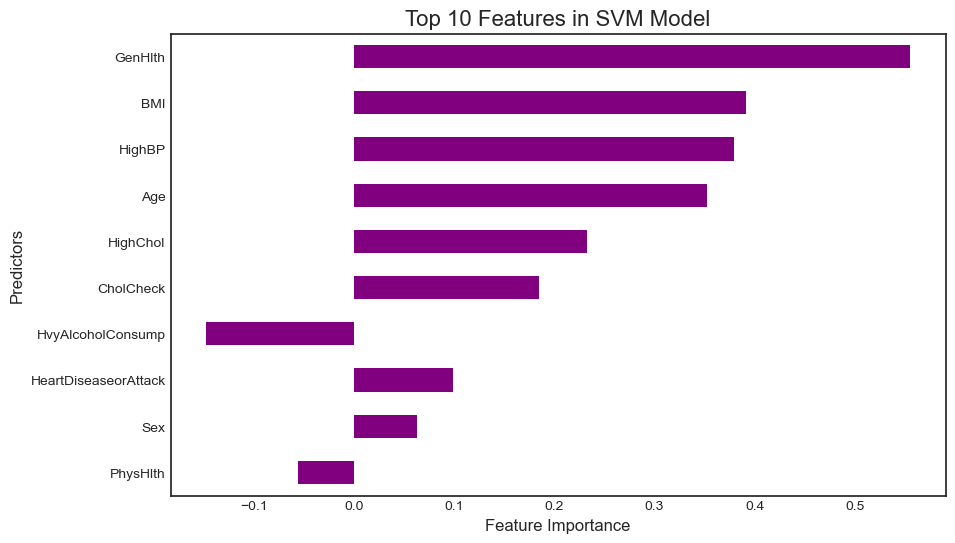

In [56]:
coefficients_svm = tuned_svm_clf.named_steps['linear_svc'].coef_[0]

# Create a pandas Series with feature importances (coefficients)
feat_importances_svm = pd.Series(coefficients_svm, index=X_train.columns)

# Get the indices of the top 10 features with the highest absolute coefficients
top_predictors_svm = np.argsort(np.abs(coefficients_svm))[-10:]

# Plot the top 10 features
feat_importances_svm[top_predictors_svm].plot(kind='barh', color='purple', figsize=(10, 6))
plt.title("Top 10 Features in SVM Model", fontsize=16)
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Predictors", fontsize=12)
plt.show()


In a support vector machine (SVM) model, a negative coefficient magnitude indicates that as the value of the feature increases, the predicted outcome (likelihood of having diabetes) decreases. This means that higher values of the feature are associated with a lower likelihood of the target condition in the context of the SVM model.

In [57]:
#recursive feature elimination (RFE) to rank the importance of features and select the top performing variables.
from sklearn.feature_selection import RFE
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)
print(X.columns[rfe.support_])

Index(['Age', 'HighChol', 'BMI', 'Smoker', 'Fruits', 'GenHlth', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'HighBP'],
      dtype='object')


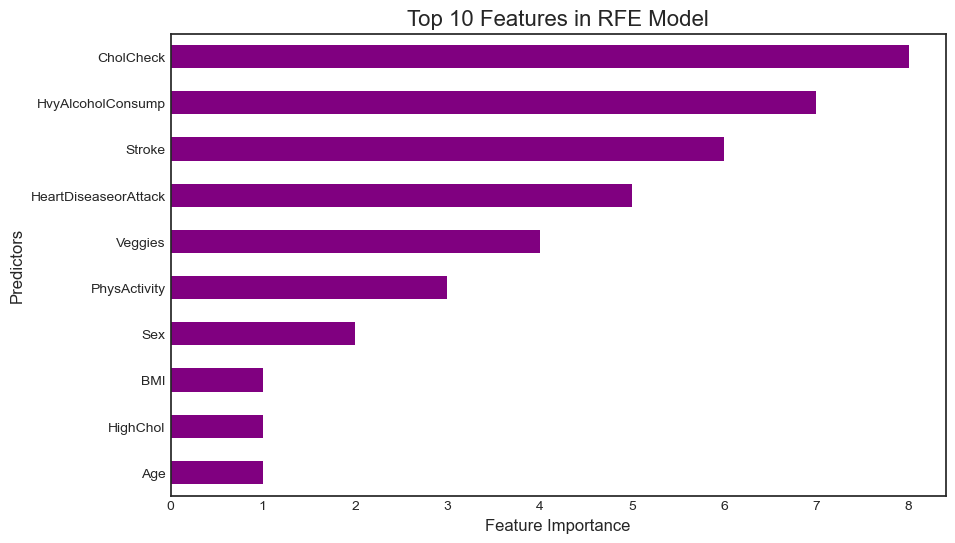

In [58]:
feat_importances_rfe = pd.Series(rfe.ranking_, index=X.columns)
feat_importances_rfe.nlargest(10).sort_values().plot(kind='barh', color='purple', figsize=(10, 6))
plt.title("Top 10 Features in RFE Model", fontsize=16)
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Predictors", fontsize=12)
plt.show()


Cross Validation of Logistic Regression

In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LG, X, y, scoring="accuracy", cv=10)
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())
print("Standard Deviation of CV Score:", scores.std())


Cross-Validation Scores: [0.74243281 0.73564356 0.75173292 0.74352808 0.74338662 0.74918659
 0.75201584 0.75201584 0.74777196 0.75343047]
Mean CV Score: 0.7471144705562447
Standard Deviation of CV Score: 0.005424513679856111


In [ ]:
scores = cross_val_score(tuned_svm_clf, X, y, scoring="accuracy", cv=10)
print("Cross-Validation Scores of SVM:", scores)
print("Mean CV Score:", scores.mean())
print("Standard Deviation of CV Score:", scores.std())


# Research Question 4: What is the impact of lifestyle factors on the likelihood of these health conditions?

In [ ]:
# Impact of lifestyle factors on health conditions
lifestyle_factors = ['Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'Fruits', 'Veggies']
health_conditions = ['Diabetes']

for factor in lifestyle_factors:
    for condition in health_conditions:
        sns.catplot(x=factor, y=condition, data=diabetes_data, kind='bar')
        plt.title(f'Impact of {factor} on {condition}')
        plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_life = X_train[['Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'Fruits', 'Veggies']]
LG_life = LogisticRegression()
LG_life.fit(X_train_life, y_train)
y_pred = LG_life.predict(X_test[['Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'Fruits', 'Veggies']])
print("Accuracy of logistic regression classifier on life style factors for diabetes: {:.4f}".format(LG_life.score(X_test[['Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'Fruits', 'Veggies']], y_test)))



In [ ]:
model = LG_life.fit(X_train_life, y_train)
# Convert the logistic regression model to statsmodels format
logit = sm.Logit(y_train, X_train_life)
logit_result = logit.fit_regularized()
print(logit_result.summary2())

In this example, we first fit the logistic regression model using scikit-learn, and then convert it to the statsmodels format to obtain a summary using the summary2 method.

The p-values obtained in the summary indicate that there are significant associations between lifestyle factors except *Veggies* and the likelihood of having Diabetes.

In [ ]:
# SGD on lifestyle
SGD = SGDClassifier(random_state=42)
SGD.fit(X_train_life, y_train)
y_pred_sgd = SGD.predict(X_test[['Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'Fruits', 'Veggies']])
print("Accuracy of SGD classifier on lifestyle predictors for diabetes: {:.4f}".format(SGD.score(X_test[['Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'Fruits', 'Veggies']], y_test)))


The accuracy of predicting diabetes only from the lifestyles factors is less than 60% in both of logistic regression and SGD model which had more than 70% percent accuracy when all predictors we used. So we can not necessarily isolate other health conditions like stroke, mental health, physcial health, cholesterol, and so on that might additionally contribute to diabetes.

In [ ]:
from sklearn.metrics import classification_report
# Print classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sgd))

# Optionally, you can print the coefficients (weights) of the features
feature_names = ['Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'Fruits', 'Veggies']
coefficients = SGD.coef_[0]

print("\nCoefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")



interpreting coefficients in the case of the SGDClassifier might not be as straightforward as in some other models, as it performs stochastic gradient descent and doesn't necessarily converge to the global minimum. Also, the interpretation of coefficients depends on the specific scaling of your features.

# Research Question 5: Are there significant differences in the prevalence of these health conditions across different demographic groups (like age, gender)?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_demo = X_train[['Age', 'Sex', 'BMI']]
LG_Demograph = LogisticRegression()
LG_Demograph.fit(X_train_demo, y_train)
y_pred = LG_Demograph.predict(X_test[['Age', 'Sex', 'BMI']])
print("Accuracy of logistic regression classifier on demographic factors for diabetes: {:.4f}".format(LG_Demograph.score(X_test[['Age', 'Sex', 'BMI']], y_test)))

In [ ]:
model_demo = LG_Demograph.fit(X_train_demo, y_train)

logit2 = sm.Logit(y_train, X_train_demo)
logit2_result = logit2.fit_regularized()
print(logit2_result.summary2())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define age group labels
age_labels = {
    1: '18-24',
    2: '25-29',
    3: '30-34',
    4: '35-39',
    5: '40-44',
    6: '45-49',
    7: '50-54',
    8: '55-59',
    9: '60-64',
    10: '65-69',
    11: '70-74',
    12: '75-79',
    13: '80 or older'
}

# Create a separate plot for 'Age' with custom x-axis labels
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x='Age', y='Diabetes', data=diabetes_data, hue='Age', ci=None, palette='viridis', saturation=0.7, dodge=False)

# Modify the x-axis labels using the age labels
plt.xticks(range(len(age_labels)), [age_labels[i] for i in sorted(age_labels.keys())])

plt.title('Prevalence of Diabetes across Age')
# Remove the default legend
plt.legend().set_visible(False)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
sns.histplot(diabetes_data, x='BMI', hue='Diabetes', multiple='stack', kde=False)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend(labels=['Diabetes', 'No Diabetes'])
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define sex labels
sex_labels = {
    0: 'Female',
    1: 'Male'
}

# Create a separate plot for 'Sex' with custom x-axis labels
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Sex', y='Diabetes', data=diabetes_data, ci=None)

# Modify the x-axis labels using the sex labels
ax.set_xticklabels([f'Sex: {sex} ({label})' for sex, label in sex_labels.items()])

plt.title('Prevalence of Diabetes across Sex')
plt.xlabel('Sex')  # Add a label for the x-axis
plt.tight_layout()  # Ensure that the x-axis labels do not overlap with the plot
plt.show()


The p-values obtained from the chi-squared tests indicate that there are significant associations between Age, Sex, BMI, and the likelihood of having Diabetes. The low p-values (close to 0) suggest that these demographic factors are indeed associated with the prevalence of Diabetes.